## Import Library dan Dataset

In [114]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("chineseMNIST.csv")

In [116]:
df.head(5)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九


In [117]:
df.shape

(15000, 4098)

## Split Dataframe

In [118]:
df_label = df["label"]

In [119]:
# Dataframe Gambar, Drop 2 Kolom Terakhir (label, character)
df_images = df.drop(["label", "character"], axis=1)

In [120]:
df_images.shape

(15000, 4096)

## Print Data

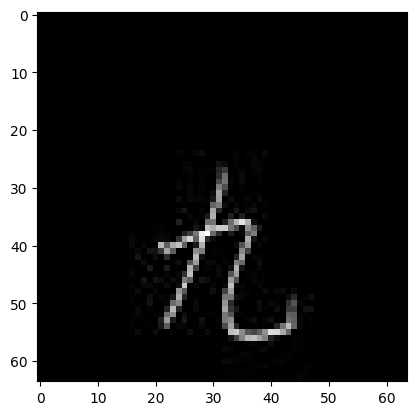

In [121]:
plt.imshow(df_images.iloc[0].values.reshape(64,64), cmap='gray');

## Encoding label

### Reshape data ke 64 x 64 x 1

In [122]:
df_images_norm = df_images/255.0
df_images_norm = df_images_norm.values.reshape(-1, 64, 64, 1)

### Mengubah label yang berangka besar

In [123]:
# Label bernilai dari 0-9
# Mengubah label berangka besar agar mempermudah encoding
df_label.replace(100, 11, inplace=True)
df_label.replace(1000, 12, inplace=True)
df_label.replace(10000, 13, inplace=True)
df_label.replace(100000000, 14, inplace=True)


In [124]:
from keras.utils.np_utils import to_categorical
df_label_encoded = to_categorical(df_label, num_classes = 15)

## Split Data Ke Training & Test

In [125]:
# Rasio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_images_norm, df_label_encoded, test_size=0.3, random_state=5)

In [126]:
print(f"Besar Training Data : {X_train.shape}")
print(f"Besar Testing Data : {X_test.shape}")

Besar Training Data : (10500, 64, 64, 1)
Besar Testing Data : (4500, 64, 64, 1)


In [127]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)), # Input layer
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax') # Output 15 (Ada 15 Karakter Berbeda)
])

## Compile Model

In [128]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

train_gen = datagen.flow(X_train, y_train, batch_size=128)

In [129]:
# Membuat Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)), # Input layer
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(15, activation="softmax"), # Output Shape 15 Karena Ada 15 Karakter Berbeda
])

In [130]:
# Compile Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
)
# Fit Model
history = model.fit(train_gen,
                    epochs = 20,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/20
83/83 [==============================] - 4s 38ms/step - loss: 2.1109 - accuracy: 0.3574 - val_loss: 1.6737 - val_accuracy: 0.5007
Epoch 2/20
83/83 [==============================] - 3s 37ms/step - loss: 1.2772 - accuracy: 0.6214 - val_loss: 1.2198 - val_accuracy: 0.6187
Epoch 3/20
83/83 [==============================] - 3s 35ms/step - loss: 0.8421 - accuracy: 0.7544 - val_loss: 0.9430 - val_accuracy: 0.6989
Epoch 4/20
83/83 [==============================] - 2s 29ms/step - loss: 0.5802 - accuracy: 0.8381 - val_loss: 0.7843 - val_accuracy: 0.7504
Epoch 5/20
83/83 [==============================] - 3s 34ms/step - loss: 0.4131 - accuracy: 0.8887 - val_loss: 0.7051 - val_accuracy: 0.7744
Epoch 6/20
83/83 [==============================] - 4s 45ms/step - loss: 0.3004 - accuracy: 0.9241 - val_loss: 0.7351 - val_accuracy: 0.7669
Epoch 7/20
83/83 [==============================] - 3s 35ms/step - loss: 0.2302 - accuracy: 0.9431 - val_loss: 0.6909 - val_accuracy: 0.7922
Epoch 8/20
83

In [131]:
eval = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy =", "{:.5f}%".format(eval[1]*100))
print("Loss     =" ,"{:.5f}".format(eval[0]))

141/141 [==============================] - 1s 9ms/step - loss: 0.8117 - accuracy: 0.8138
Accuracy = 81.37778%
Loss     = 0.81175


In [132]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

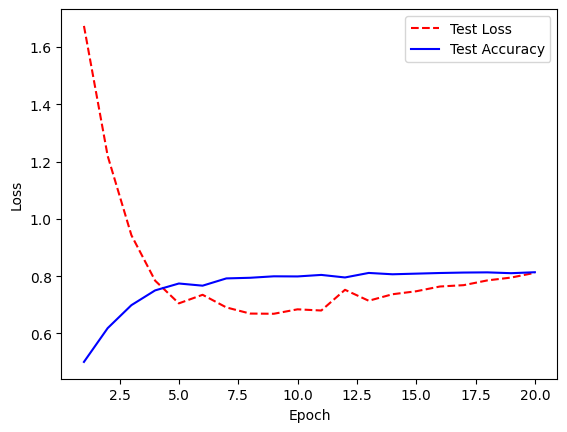

In [133]:
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, test_loss, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Test Loss', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

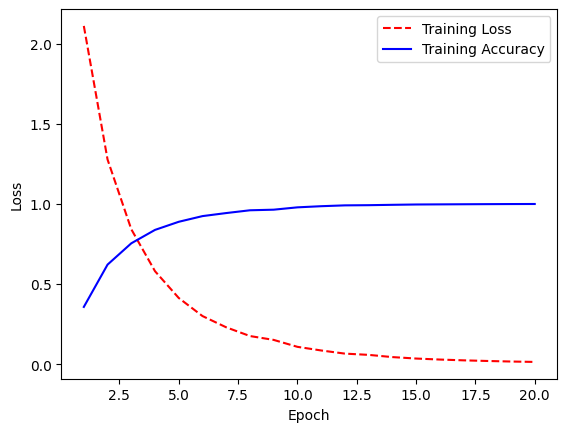

In [134]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [135]:
class_names = np.unique(df_label[:]).astype(str)
chinese_digits = np.unique(df["character"]).astype(str)

print(pd.DataFrame({"Class": class_names, "   Chinese digit": chinese_digits}).to_string(index=False))

Class    Chinese digit
    0                一
    1                七
    2                万
    3                三
    4                九
    5                二
    6                五
    7                亿
    8                八
    9                六
   10                十
   11                千
   12                四
   13                百
   14                零


## Prediksi Gambar

In [136]:
prediction = model.predict(X_test)

141/141 [==============================] - 1s 8ms/step


In [137]:
label = np.argmax(prediction, axis=1)

In [138]:
label_aktual = np.argmax(y_test[4]) # Prediksi Gambar Ke 5 Dari Test Set

In [139]:
img = X_test[4]

Aktual Label:  7
Label Diprediksi:  10


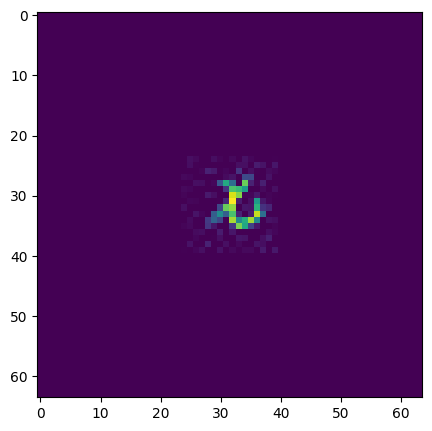

In [140]:
plt.figure(figsize=(5, 5))
plt.imshow(img)
print("Aktual Label: ", label_aktual)
print("Label Diprediksi: ", label[4])

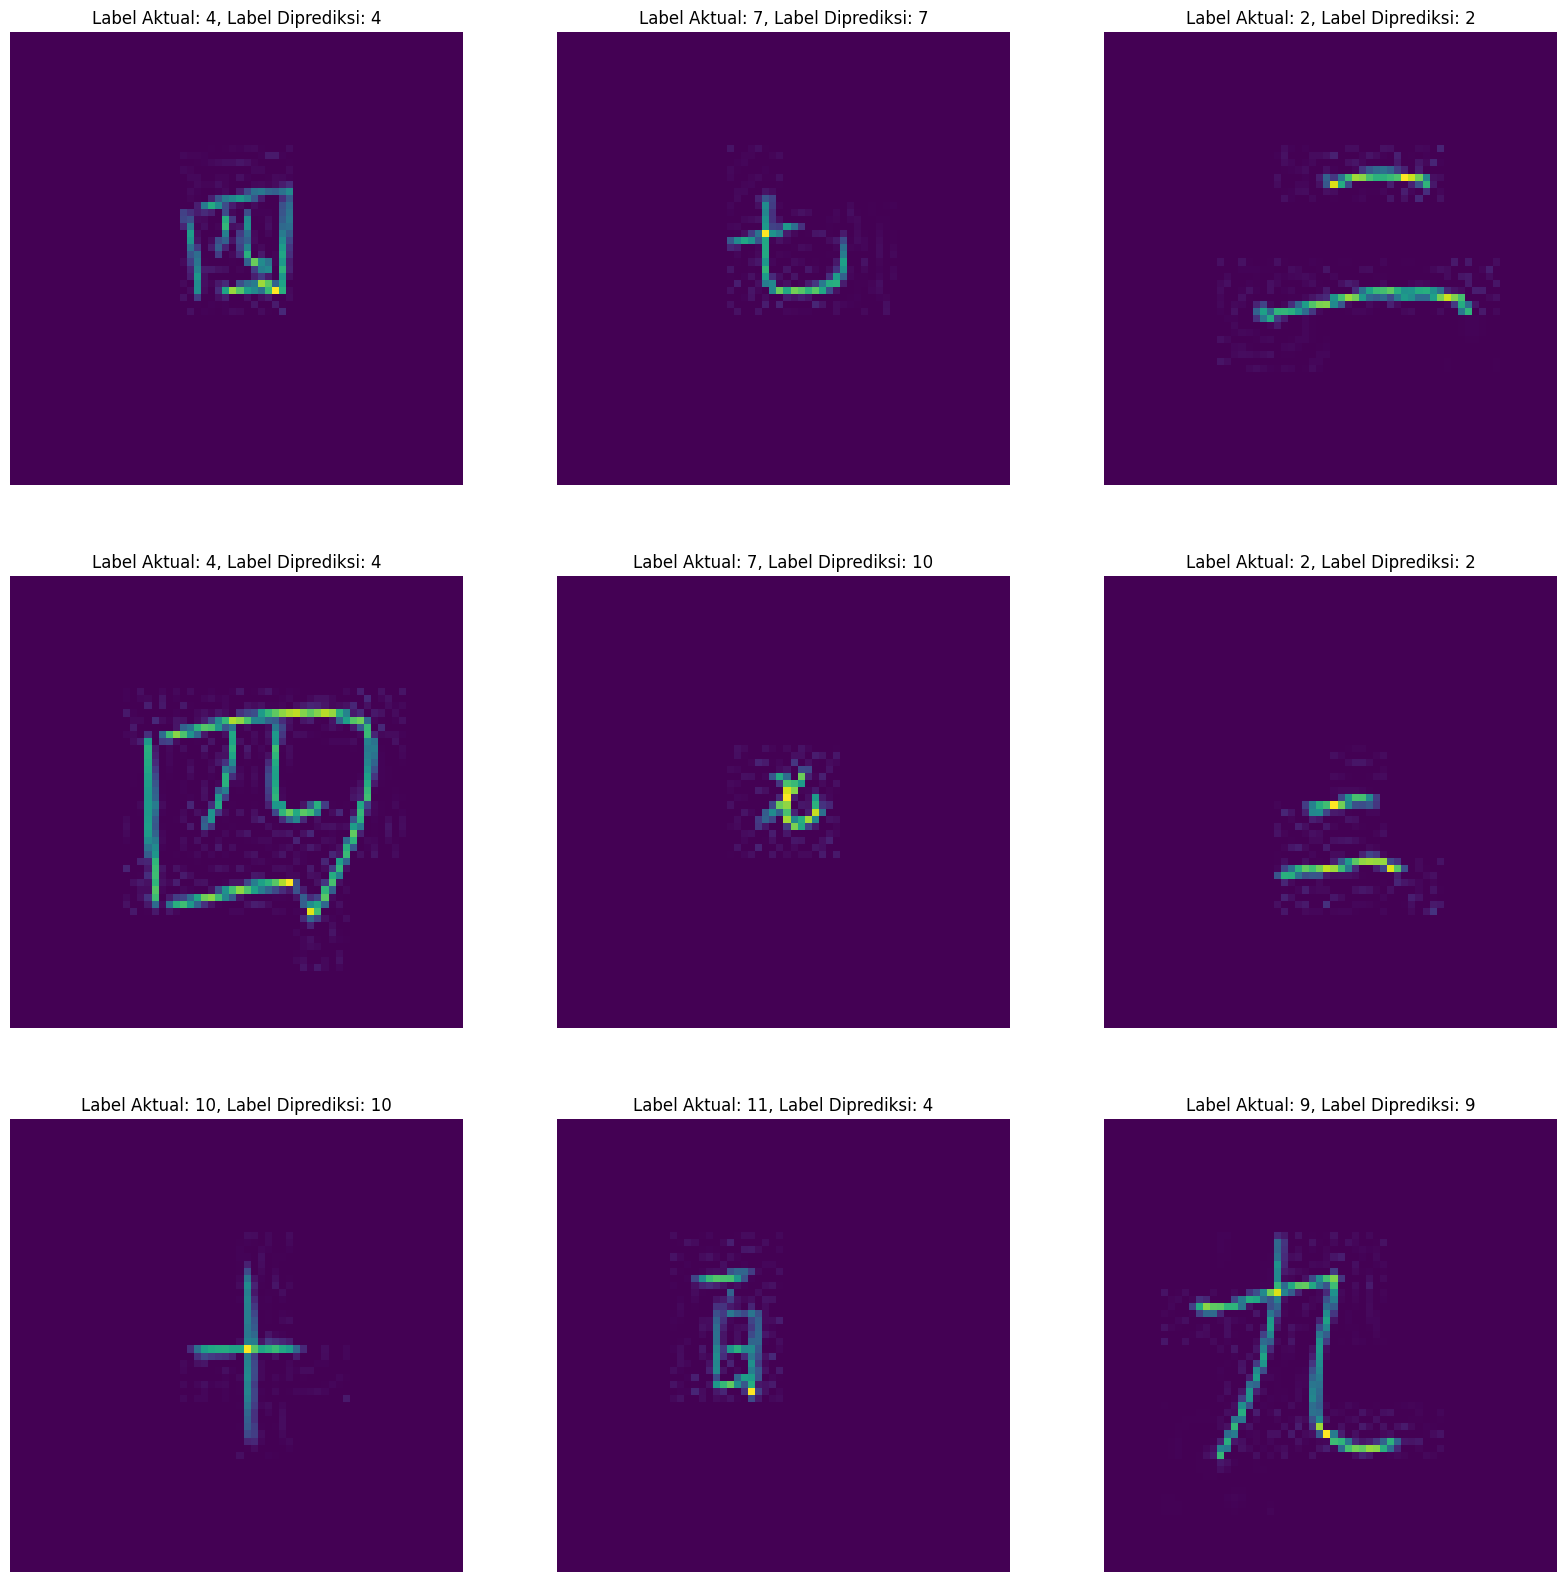

In [141]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    
    actual_label = np.argmax(y_test[i])
    plt.title(f'Label Aktual: {actual_label}, Label Diprediksi: {label[i]}')
    plt.imshow(X_test[i])
    plt.axis('off')
    
plt.show()